In [ ]:
!python -m spacy download fr_dep_news_trf 
# télécharger le modèle

In [ ]:
!pip install 'spacy[transformers]'
import spacy_transformers 
# pour que le modèle marche bien dans ce notebook


In [5]:
import spacy
nlp = spacy.load('fr_dep_news_trf') # importer le modèle 

In [ ]:
with open('obesite_2.2-2.3.txt', 'r') as file:    
    doc = nlp(file.read()) # tokénisation
    for i, w in enumerate(doc):
        print(i, w.text) # afficher le résultat de la tokénisation

In [10]:
import csv
# sauvegarder le résultat de l'annotation dans un fichier CSV
with open('bert.csv','w',newline='',encoding='utf-8') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['FORME','LEMME','POS','DEP'])
    for w in doc:
        if w.pos_ != 'SPACE': # jeter le résultat des espaces
            writer.writerow([w.text,w.lemma_,w.pos_,w.dep_]) 


In [14]:
# Création d'une matrice de confusion 
# pour visualiser la performance du modèle
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sn
from sklearn.metrics import classification_report

In [ ]:
df = pd.read_csv('bert.csv')
pos_actu = df['POS_correct'].tolist()
pos_pred = df['POS_predicted'].tolist()

cm = pd.crosstab(
    pos_actu, pos_pred,
    rownames=['Réelle'], colnames=['Estimée'], margins=False)

# print(type(cm))
# print(cm) # décommenter pour voir le dataframe
# cm.values

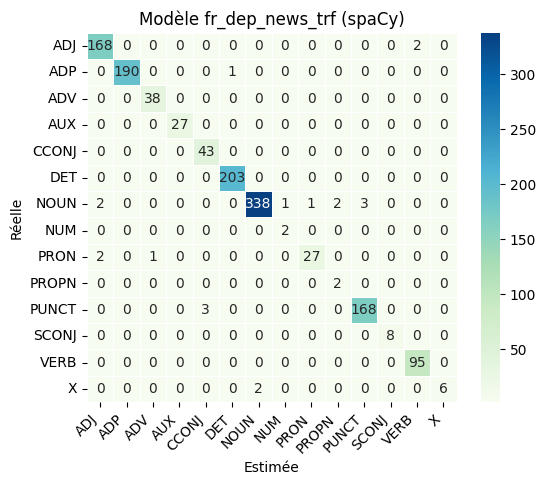

In [13]:
ax = sn.heatmap(
    cm, 
    annot=True, 
    square=True, 
    cmap='GnBu',
    vmax=338, 
    vmin=2, 
    fmt='d', 
    linewidth=.5,
)

label_x = ax.get_xticklabels()
plt.setp(label_x, rotation=45, horizontalalignment="right")
plt.title('Modèle fr_dep_news_trf (spaCy)')
# quelques personnalisations

plt.show() # afficher la matrice de confusion

In [15]:
# affichage infos statistiques
print(classification_report(pos_actu, pos_pred))

              precision    recall  f1-score   support

         ADJ       0.98      0.99      0.98       170
         ADP       1.00      0.99      1.00       191
         ADV       0.97      1.00      0.99        38
         AUX       1.00      1.00      1.00        27
       CCONJ       0.93      1.00      0.97        43
         DET       1.00      1.00      1.00       203
        NOUN       0.99      0.97      0.98       347
         NUM       0.67      1.00      0.80         2
        PRON       0.96      0.90      0.93        30
       PROPN       0.50      1.00      0.67         2
       PUNCT       0.98      0.98      0.98       171
       SCONJ       1.00      1.00      1.00         8
        VERB       0.98      1.00      0.99        95
           X       1.00      0.75      0.86         8

    accuracy                           0.99      1335
   macro avg       0.93      0.97      0.94      1335
weighted avg       0.99      0.99      0.99      1335

